In [1]:
import numpy as np
import pandas as pd
from plotnine import *
from plydata import *

This little project will look into whether we can predict a movie's success based on its characteristics (like budget or director). For the sake of flexibility, there will be 2 determinants of success: IMDB score and gross revenue. 

To begin, I checked the available factors and overall dimensionality of the data.

In [27]:
# Load data
data = pd.read_csv('movies.csv', encoding='latin1')

In [3]:
# Visualize the characteristics that are available
list(data)

['budget',
 'company',
 'country',
 'director',
 'genre',
 'gross',
 'name',
 'rating',
 'released',
 'runtime',
 'score',
 'star',
 'votes',
 'writer',
 'year']

In [4]:
# Check the dimensionality
data.shape

(6820, 15)

As it turns out, `year` and `released` contain similar information. Here I'm only interested in year, so I'll remove that column. I'll also remove `name`, since its a unique identifier that won't provide any predictive info (unless I were to do a semantic analysis, but no...). It is also worth checking if country will be a useful predictor. If most movies come from the US, then there might not be enough variability in this feature to justify its inclusion.

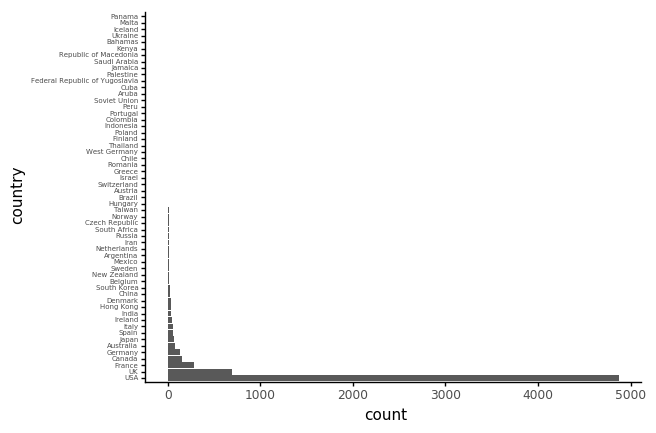

<ggplot: (280354105)>

In [5]:
# Get the number of times each country appears
countrydata = data.groupby('country').size().reset_index(name='count')


# count the manufacturer and sort by the count 
c_categories = (data >> count('country', sort=True) >> pull('country'))

df = data.copy()
df['country'] = pd.Categorical(df['country'], categories=c_categories, ordered=True)

# plot
(ggplot(df) + 
 aes(x='country') +
 geom_bar() + 
 coord_flip() +
 theme_classic() +
 theme(axis_text_y=element_text(size=5))
)

The answer seems to be that country will be unhelpful, so I'll also remove it.

In [6]:
# Remove the chosen columns
data.drop(['released','name','country'], inplace=True, axis=1)

Now that the features have been trimmed, here is a short set of descriptive stats for the numeric factors of the data. This is meant to give a broad overview of any interesting/doubtful elements.

In [7]:
pd.DataFrame.describe(data)

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


I'll pay no attenton to year for now, since it will be useful to keep it as a continuous numeric column for visualization purposes. At first sight, it's curious that the 25th percentile of budget amounts is 0. Since there are so many datapoints, I'll see how much we lose by removing movies with the impossible budget of 0.

In [33]:
# Remove free moviesd
data[data.country == "Chile"]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5928,0.0,Participant Media,Chile,Pablo Larraín,Drama,2343664.0,No,R,2012-11-09,118,7.4,Gael García Bernal,19935,Pedro Peirano,2012
6515,26000000.0,Alcon Entertainment,Chile,Patricia Riggen,Biography,12188642.0,Los 33,PG-13,2015-11-13,127,6.9,Antonio Banderas,27925,Mikko Alanne,2015
6656,9000000.0,Fox Searchlight Pictures,Chile,Pablo Larraín,Biography,13958679.0,Jackie,R,2016-12-02,100,6.8,Natalie Portman,50652,Noah Oppenheim,2016
6791,0.0,AZ Films,Chile,Pablo Larraín,Biography,938875.0,Neruda,R,2017-03-10,107,7.0,Gael García Bernal,5680,Guillermo Calderón,2016


In [14]:
data.shape

(4638, 12)

/Applications/anaconda2/envs/python3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:95: UserWarning: 'stat_bin()' using 'bins = 70'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


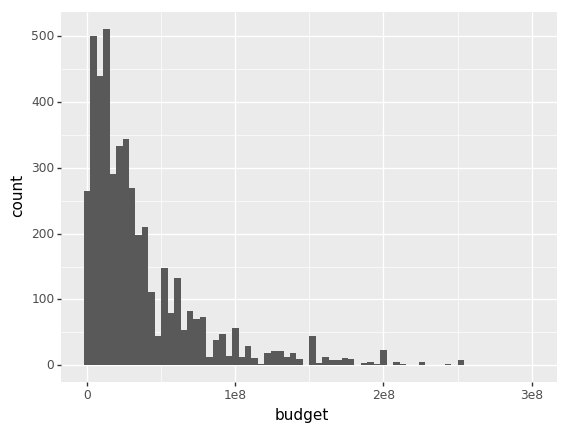

<ggplot: (281099612)>

In [19]:
(ggplot(aes(x='budget'), data = data) +
 geom_histogram()
)

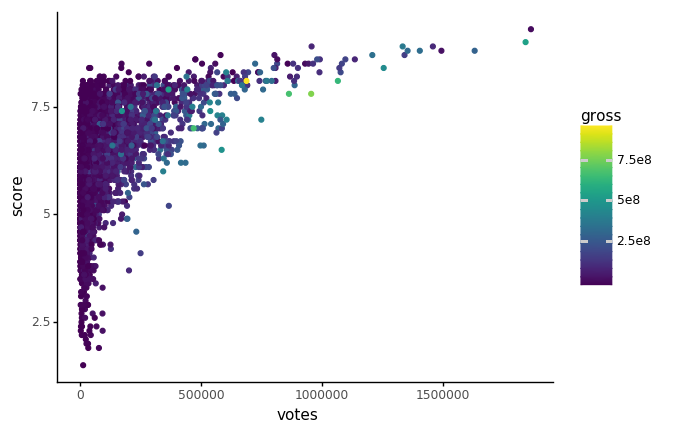

<ggplot: (280775600)>

In [10]:
(ggplot(aes(x='votes', y='score', color = 'gross'), data=data) +
 geom_point() +
 theme_classic()
)

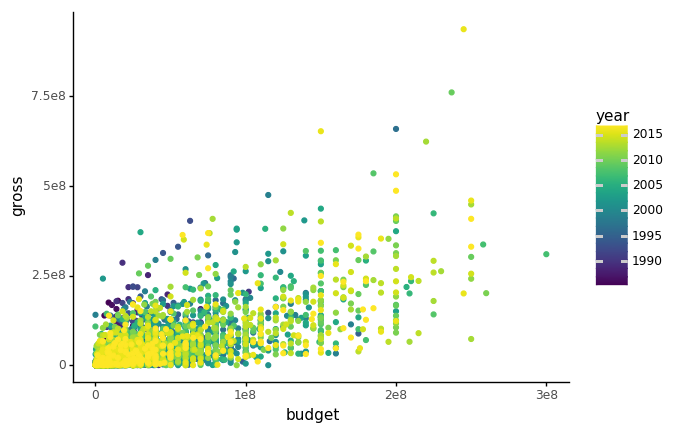

<ggplot: (280943613)>

In [20]:
(ggplot(aes(x='budget', y='gross', color = 'year'), data=data) +
 geom_point() +
 theme_classic()
)